LAST UPDATED ON 2023/04/28

1. aims at exploring the mechanism of [Adam](https://arxiv.org/abs/1412.6980)

# Import Libraries

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

# Define Objective Function and Derivative Function

In [2]:
def compute_obj(x):
    return x[0]**2. + x[1]**2.

def compute_derivative(x):
    return np.array([x[0]*2.0, x[1]*2.0])

# Define Optimizer

In [3]:
class Adam:
    def __init__(self, beta1 = 0.9, beta2 = 0.99, m1 = 0, m2 = 0, alpha = 1e-3, eps = 1e-16):
        
        self.beta1 = beta1
        self.beta2 = beta2
        self.alpha = alpha
        self.eps   = eps
        self.iter  = 0
        self.is_init = False
    
    def init_momentum(self, in_size):
        self.m1 = np.zeros((in_size,))
        self.m2 = np.zeros((in_size,))
        self.is_init = True
        
    def adam_fit(self, x, eval_fcn = None, derivative_fcn = None):
        if eval_fcn is None or derivative_fcn is None:
            return np.empty((len(x), )), None
        
        if not self.is_init:
            self.init_momentum(len(x))
        
        g = derivative_fcn(x)
        self.m1 = self.beta1*self.m1 + (1. - self.beta1)*g
        self.m2 = self.beta2*self.m2 + (1. - self.beta2)*g**2
        m1_hat  = self.m1/(1. - self.beta1**(self.iter + 1))
        m2_hat  = self.m2/(1. - self.beta2**(self.iter + 1))
        out     = x - self.alpha*m1_hat/(np.sqrt(m2_hat) + self.eps)
        
        loss = eval_fcn(out)
        
        return out, loss

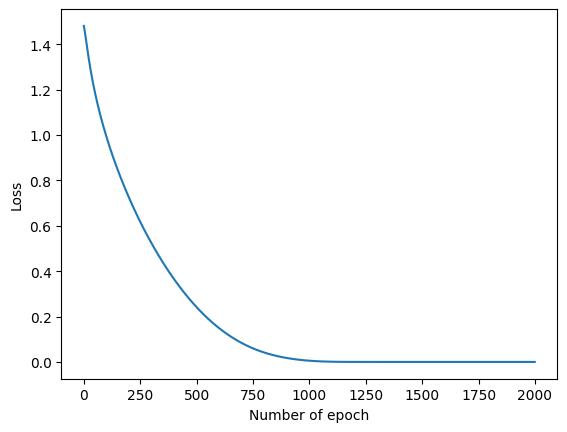

In [4]:
EPOCH = 2000

x = np.zeros((EPOCH + 1, 2))
loss = [None]*EPOCH

#initialize input
x[0] = np.random.random(2)
#initialize optimizer
opt  = Adam()
#start training
for i in range(EPOCH):
    x[i + 1], loss[i] = opt.adam_fit(x[i], eval_fcn = compute_obj, derivative_fcn = compute_derivative)

plt.plot(loss)
plt.ylabel('Loss')
plt.xlabel('Number of epoch')
plt.show()

# Plot the Loss Surface

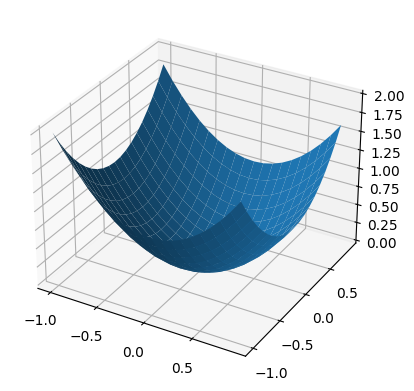

In [5]:
min_val, max_val = -1., 1.
mesh_x_range = np.arange(min_val, max_val, 0.1) 
mesh_y_range = np.arange(min_val, max_val, 0.1)

mesh_x, mesh_y = np.meshgrid(mesh_x_range, mesh_y_range)
mesh_z  = compute_obj([mesh_x, mesh_y])

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(mesh_x, mesh_y, mesh_z)


# Plot the Optimization Process

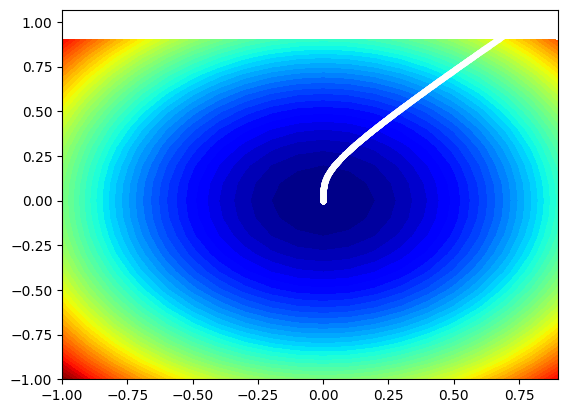

In [6]:
plt.contourf(mesh_x, mesh_y, mesh_z, levels = 50, cmap = 'jet')
plt.plot(x[:,0], x[:, 1], '.-', color = 'w')
plt.show()